In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
df = pd.read_csv("winee.data",delimiter = "\t")

In [5]:
df.head()

,"1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065"
0,"1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4..."
1,"1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5...."
2,"1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7..."
3,"1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.3..."
4,"1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6..."


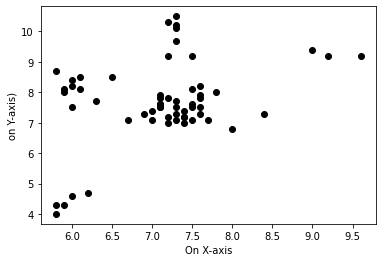

In [373]:
X = df[["mass","width","height"]]
data = df
p = data[["height","width"]]
 #Visualise data points
plt.scatter(p["width"],p["height"],c='black')
plt.xlabel('On X-axis')
plt.ylabel('on Y-axis)')
plt.show()

In [374]:
Y = df["winee"]

In [375]:
trainX = np.array(X[:50])
trainY = np.array(Y[:50])
testX = np.array(X[50:])
testY = np.array(Y[50:])


In [376]:
class KNN:
    def __init__(self,k = 1):
        self.k = k
        
    def euclidian_distance(self,query,X):
        difference = np.array(X) - np.array(query)
        sqrd_diff = np.square(difference)
        sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
        distance = np.sqrt(sum_sqrd_diff)
        return distance
    
    def nearest_neighbours(self,distance):
        return np.argsort(distance)[:self.k]
    
    def predict(self,query,trainX,trainY):
        ed = self.euclidian_distance(query,trainX)
        nn = self.nearest_neighbours(ed)
        labels_nn = list(trainY[nn])
        return max(labels_nn, key = labels_nn.count) 
    

In [377]:
classifier = KNN(4)

In [378]:
predictions = [classifier.predict(x,trainX,trainY) for x in testX]

In [379]:
predictions

[3, 3, 3, 3, 3, 3, 3, 3, 3]

In [380]:
testY

array([4, 4, 4, 4, 4, 4, 4, 4, 4])

In [381]:
df = pd.read_csv("winee.data",delimiter = "\t")

In [382]:
X = np.array(df[["mass","width","height","color_score"]])

In [383]:
X.shape

(59, 4)

# STEP 1

In [384]:
K = 4

# STEP 2

In [385]:
centroidIndex = np.random.randint(0,58,(4,))

In [386]:
centroidIndex

array([ 1,  4, 31,  4])

In [387]:
centroids = X[centroidIndex]

In [388]:
centroids

array([[180.  ,   8.  ,   6.8 ,   0.59],
       [ 84.  ,   6.  ,   4.6 ,   0.79],
       [210.  ,   7.8 ,   8.  ,   0.82],
       [ 84.  ,   6.  ,   4.6 ,   0.79]])

In [389]:
X_ = np.delete(X,centroidIndex, axis = 0)

In [390]:
clusters = [[],[],[],[]]
clusters[0].append(centroids[0])
clusters[1].append(centroids[1])
clusters[2].append(centroids[2])
clusters[3].append(centroids[3])


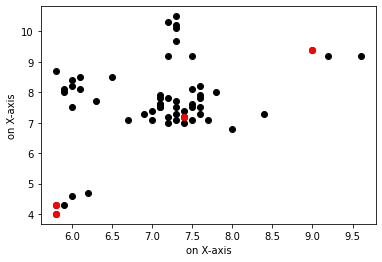

In [391]:
Centroids = (p.sample(n=K))
plt.scatter(p["width"],p["height"],c='black')
plt.scatter(Centroids["width"],Centroids["height"],c='red')
plt.xlabel('on X-axis')
plt.ylabel('on X-axis')
plt.show()

# STEP 3

In [392]:
def euclidian_distance(query,X):
        difference = np.array(X) - np.array(query)
        sqrd_diff = np.square(difference)
        sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
        distance = np.sqrt(sum_sqrd_diff)
        return distance

In [393]:
for x in X_:
    id = np.argmin(euclidian_distance(x,centroids))
    clusters[id].append(x)

In [394]:
len(clusters[0])

36

In [395]:
len(clusters[1])

13

In [396]:
len(clusters[2])

10

In [397]:
len(clusters[3])

1

In [398]:
#step 4

In [399]:
centroids[0] = np.mean(clusters[0],axis = 0)

In [400]:
centroids[1] = np.mean(clusters[1],axis = 0)

In [401]:
centroids[2] = np.mean(clusters[2],axis = 0)

In [402]:
centroids[3] = np.mean(clusters[3],axis = 0)
centroids 

array([[1.63388889e+02, 7.27777778e+00, 7.70000000e+00, 7.73888889e-01],
       [1.04307692e+02, 6.00000000e+00, 6.64615385e+00, 7.48461538e-01],
       [3.30860000e+03, 7.97000000e+00, 9.04000000e+00, 7.43000000e-01],
       [8.40000000e+01, 6.00000000e+00, 4.60000000e+00, 7.90000000e-01]])

In [403]:
#step 5

In [404]:
for i in range(10):
    clusters = [[],[],[],[]]
    for x in X_:
        id = np.argmin(euclidian_distance(x,centroids))
        clusters[id].append(x)
    c = np.array(clusters, dtype = object)
        
    for i in range(K):
        centroids[i] = np.mean(c[i],axis = 0)
        print(centroids[i])
    print()

[201.0952381    7.45238095   8.01428571   0.77071429]
[120.22222222   6.01111111   8.13333333   0.72      ]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[80.5     5.925   4.325   0.7975]

[233.84    7.616   8.38    0.764]
[141.61538462   6.79615385   7.70384615   0.75961538]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[80.5     5.925   4.325   0.7975]

[313.81818182   7.99090909   9.14545455   0.71090909]
[151.9       6.98      7.73      0.77575]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[80.5     5.925   4.325   0.7975]

[515.       8.85     8.825    0.7275]
[162.88372093   7.14883721   7.96976744   0.76883721]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[98.25     6.       6.1375   0.75875]

[515.       8.85     8.825    0.7275]
[167.12820513   7.26666667   7.94871795   0.77410256]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[106.           6.           6.81666667   0.745     ]

[515.       8.85     8.825    0.7275]
[168.05263158   7.30526316   7.92894737   0.77526316]
[3.0e+04 7.1e+00 7.5e+00 7.8e-01]
[108.           5.98461538   